In [ ]:

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'C:/Users/Archana/OneDrive/Attachments/Desktop/MDTM46B/Project 5-Multiclass Fish Image Classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
val_dir = 'C:/Users/Archana/OneDrive/Attachments/Desktop/MDTM46B/Project 5-Multiclass Fish Image Classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val'
test_dir = 'C:/Users/Archana/OneDrive/Attachments/Desktop/MDTM46B/Project 5-Multiclass Fish Image Classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'

In [ ]:

img_height =  224
img_width =  224
batch_size = 32

In [ ]:

datagen_train = ImageDataGenerator(
    rescale=1./255
    ,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
     

In [ ]:

datagen_val_test = ImageDataGenerator(rescale=1./255)


In [ ]:
train_data = datagen_train.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.


In [ ]:

val_data = datagen_val_test.flow_from_directory(
    val_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
     

Found 1092 images belonging to 11 classes.


In [ ]:

test_data = datagen_val_test.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3187 images belonging to 11 classes.


In [ ]:
print("✅ Classes:", train_data.class_indices)

✅ Classes: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


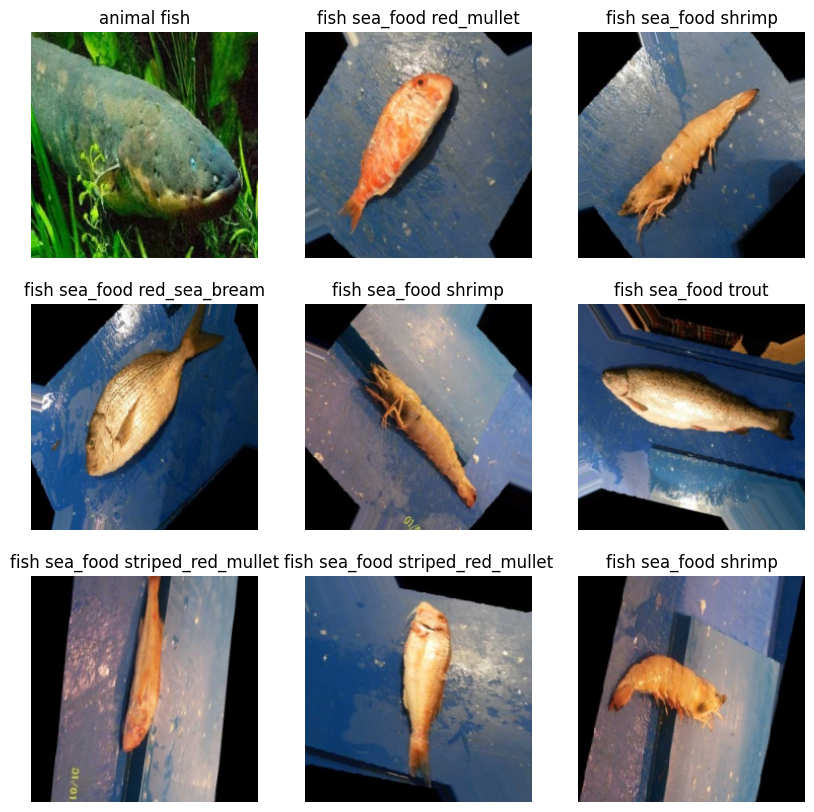

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
images,labels=next(train_data)
plt.figure(figsize=(10,10))

for i in range (9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        class_names=list(train_data.class_indices.keys())
        img_label=class_names[np.argmax(labels[i])]
        
        
        plt.title(img_label)
        plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
   
    Dense(train_data.num_classes, activation='softmax')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

c:\Users\Archana\OneDrive\Attachments\Desktop\MDTM46B\phonepe_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,395 (84.87 MB)

 Trainable params: 22,247,947 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
history_cnn = cnn_model.fit(train_data,epochs=20,validation_data=val_data)
     

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.5092 - loss: 1.7264 - val_accuracy: 0.1429 - val_loss: 17.4505
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.6535 - loss: 1.0394 - val_accuracy: 0.3544 - val_loss: 5.6292
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.7255 - loss: 0.8544 - val_accuracy: 0.7674 - val_loss: 0.7206
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1515s 8s/step - accuracy: 0.7733 - loss: 0.6831 - val_accuracy: 0.8901 - val_loss: 0.3694
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.8116 - loss: 0.5882 - val_accuracy: 0.9084 - val_loss: 0.3091
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.8365 - loss: 0.4831 - val_accuracy: 0.9267 - val_loss: 0.2627
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.8546 - loss: 0.4419 - val_accuracy: 0.9332 - val_loss: 0.2727
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.8779 - loss: 0.3809 - val_ac

In [17]:
cnn_model.save('/content/cnn_fish_model.h5')
cnn_model.save('/content/cnn_fish_model.keras')
print("✅ Saved cnn_fish_model.h5")

✅ Saved cnn_fish_model.h5


MODEL 1: VGG16

In [18]:
#Essential Imports
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout
from tensorflow.keras.optimizers import Adam


In [19]:
#Load pre-trained VGG16
VGG_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [20]:
#Modifying the output layer
x = VGG_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=VGG_base_model.input, outputs=output)

In [21]:
#Set whole model trainable
VGG_base_model.trainable = True

#Freeze all layers except 4
for layer in VGG_base_model.layers[:-4]:
    layer.trainable = False
#compile the model

model_vgg.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_vgg = model_vgg.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
)

model_vgg.save('VGG16/vgg16_finetuned_model.h5')

model_vgg.save('VGG16/vgg16_finetuned_model.keras')


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1367s 7s/step - accuracy: 0.3227 - loss: 1.9600 - val_accuracy: 0.5797 - val_loss: 1.3761
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1341s 7s/step - accuracy: 0.6315 - loss: 1.1424 - val_accuracy: 0.8535 - val_loss: 0.6648
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1307s 7s/step - accuracy: 0.7807 - loss: 0.7249 - val_accuracy: 0.9057 - val_loss: 0.3973
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1305s 7s/step - accuracy: 0.8472 - loss: 0.5131 - val_accuracy: 0.9597 - val_loss: 0.2709
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1896s 10s/step - accuracy: 0.8867 - loss: 0.3953 - val_accuracy: 0.9698 - val_loss: 0.1930


MODEL 2 : ResNet50

In [23]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from tensorflow.keras.applications import ResNet50
#Load pre-trained ResNet50
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Modifying the output layer
x = resnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=resnet_base_model.input, outputs=output)

In [28]:
#Set whole model trainable
resnet_base_model.trainable = True

#Freeze all layers except 4
for layer in resnet_base_model.layers[:-20]:
    layer.trainable = False
#compile the model

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_resnet= model_resnet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

model_resnet.save('ResNet50/resnet_finetuned_model.h5')

model_resnet.save('ResNet50/resnet_finetuned_model.keras')


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 673s 3s/step - accuracy: 0.2371 - loss: 2.1531 - val_accuracy: 0.0833 - val_loss: 2.5608
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 566s 3s/step - accuracy: 0.3846 - loss: 1.8157 - val_accuracy: 0.2106 - val_loss: 2.1229
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.4594 - loss: 1.5985 - val_accuracy: 0.6227 - val_loss: 1.3287
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.5173 - loss: 1.4340 - val_accuracy: 0.6520 - val_loss: 1.1998
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 535s 3s/step - accuracy: 0.5659 - loss: 1.2985 - val_accuracy: 0.6731 - val_loss: 1.0676
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 518s 3s/step - accuracy: 0.5928 - loss: 1.2097 - val_accuracy: 0.6923 - val_loss: 1.0022
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 520s 3s/step - accuracy: 0.6304 - loss: 1.1072 - val_accuracy: 0.7005 - val_loss: 0.9643
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 500s 3s/step - accuracy: 0.6617 - loss: 1.0469 - val_accu

MODEL 3 -MobileNet

In [29]:
from tensorflow.keras.applications import MobileNet
#Load pre-trained MobileNet
mobilenet_base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Modifying the output layer
x = mobilenet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_mobilenet = Model(inputs=mobilenet_base_model.input, outputs=output)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 118s 7us/step


In [31]:
#Set whole model trainable
mobilenet_base_model.trainable = True

#Freeze all layers except 4
for layer in mobilenet_base_model.layers[:-30]:
    layer.trainable = False
#compile the model

model_mobilenet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_mobilenet= model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

model_mobilenet.save('MobileNet/mobilenet_finetuned_model.h5')

model_mobilenet.save('MobileNet/mobilenet_finetuned_model.keras')


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.2154 - loss: 2.4836 - val_accuracy: 0.6190 - val_loss: 1.4141
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.5618 - loss: 1.3700 - val_accuracy: 0.8791 - val_loss: 0.7272
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.7309 - loss: 0.8755 - val_accuracy: 0.9423 - val_loss: 0.4092
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.8353 - loss: 0.6011 - val_accuracy: 0.9625 - val_loss: 0.2563
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.8819 - loss: 0.4389 - val_accuracy: 0.9753 - val_loss: 0.1772
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.9092 - loss: 0.3460 - val_accuracy: 0.9808 - val_loss: 0.1344
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9309 - loss: 0.2733 - val_accuracy: 0.9835 - val_loss: 0.1050
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.9491 - loss: 0.2185 - val_accu

MODEL 4 : InceptionV3

In [32]:
from tensorflow.keras.applications import InceptionV3
#Load pre-trained InceptionV3
inception_base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Modifying the output layer
x = inception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_inception = Model(inputs=inception_base_model.input, outputs=output)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [56]:
#Set whole model trainable
inception_base_model.trainable = True

#Freeze all layers except 4
for layer in inception_base_model.layers[:-50]:
    layer.trainable = False
#compile the model

model_inception.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_inception= model_inception.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

model_inception.save('InceptionV3/inception_finetuned_model.h5')

model_inception.save('InceptionV3/inception_finetuned_model.keras')


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - accuracy: 0.9791 - loss: 0.0895 - val_accuracy: 0.9890 - val_loss: 0.0419
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.9770 - loss: 0.0841 - val_accuracy: 0.9890 - val_loss: 0.0363
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.9843 - loss: 0.0671 - val_accuracy: 0.9899 - val_loss: 0.0307
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.9833 - loss: 0.0618 - val_accuracy: 0.9908 - val_loss: 0.0284
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9876 - loss: 0.0512 - val_accuracy: 0.9927 - val_loss: 0.0238
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9860 - loss: 0.0522 - val_accuracy: 0.9936 - val_loss: 0.0221
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9884 - loss: 0.0436 - val_accuracy: 0.9936 - val_loss: 0.0205
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.9888 - loss: 0.0429 - val_accu

Model 5: EfficientNetB0

In [34]:
from tensorflow.keras.applications import EfficientNetB0
#Load pre-trained EfficientNetB0
efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Modifying the output layer
x = efficientnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_efficientnet = Model(inputs=efficientnet_base_model.input, outputs=output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [35]:
#Set whole model trainable
efficientnet_base_model.trainable = True

#Freeze all layers except 4
for layer in efficientnet_base_model.layers[:-20]:
    layer.trainable = False
#compile the model

model_efficientnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_efficientnet= model_efficientnet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

model_efficientnet.save('EfficientNetB0/efficientnet_finetuned_model.h5')

model_efficientnet.save('EfficientNetB0/efficientnet_finetuned_model.keras')


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.1176 - loss: 2.3971 - val_accuracy: 0.0897 - val_loss: 2.3975
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.1505 - loss: 2.3587 - val_accuracy: 0.1712 - val_loss: 2.3485
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.1602 - loss: 2.3440 - val_accuracy: 0.1712 - val_loss: 2.3321
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.1634 - loss: 2.3349 - val_accuracy: 0.1712 - val_loss: 2.3248
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.1674 - loss: 2.3331 - val_accuracy: 0.1712 - val_loss: 2.3188
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.1640 - loss: 2.3314 - val_accuracy: 0.1712 - val_loss: 2.3192
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.1680 - loss: 2.3273 - val_accuracy: 0.1712 - val_loss: 2.3158
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.1680 - loss: 2.3268 - val_accu

Accuracy

In [57]:
#Computing CNN Accuracy
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_data)
print(f"Custom CNN Accuracy: {cnn_accuracy:.4f}")

#Computing fine tuned VGG16s Accuracy
vgg_loss, vgg_accuracy = model_vgg.evaluate(test_data)
print(f"VGG16 Accuracy: {vgg_accuracy:.4f}")

#Computing fine tuned ResNet50s Accuracy
resnet_loss, resnet_accuracy = model_resnet.evaluate(test_data)
print(f"ResNet50 Accuracy: {resnet_accuracy:.4f}")

#Computing fine tuned MobileNets Accuracy
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(test_data)
print(f"MobileNet Accuracy: {mobilenet_accuracy:.4f}")

#Computing fine tuned Inceptionv3 Accuracy
inception_loss, inception_accuracy = model_inception.evaluate(test_data)
print(f"InceptionV3 Accuracy: {inception_accuracy:.4f}")

#Computing fine tuned EfficientNetb0 Accuracy
efficient_loss, efficient_accuracy = model_efficientnet.evaluate(test_data)
print(f"EfficientNetB0 Accuracy: {efficient_accuracy:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 347ms/step - accuracy: 0.9903 - loss: 0.0556
Custom CNN Accuracy: 0.9903
100/100 ━━━━━━━━━━━━━━━━━━━━ 577s 6s/step - accuracy: 0.9762 - loss: 0.1603
VGG16 Accuracy: 0.9762
100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7669 - loss: 0.7064
ResNet50 Accuracy: 0.7669
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 485ms/step - accuracy: 0.9928 - loss: 0.0379
MobileNet Accuracy: 0.9928
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.9984 - loss: 0.0078
InceptionV3 Accuracy: 0.9984
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 654ms/step - accuracy: 0.1632 - loss: 2.3100
EfficientNetB0 Accuracy: 0.1632


Precision,Recall,F1-Score

In [37]:
from sklearn.metrics import classification_report
import numpy as np

In [38]:
# Custom CNN
test_data.reset()
cnn_prob = cnn_model.predict(test_data, verbose=0)
cnn_pred = np.argmax(cnn_prob, axis=1)
print("=== Custom CNN ===")
print(classification_report(test_data.classes, cnn_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== Custom CNN ===
                                  precision    recall  f1-score   support

                     animal fish     0.9772    0.9904    0.9838       520
                animal fish bass     0.5000    0.0769    0.1333        13
   fish sea_food black_sea_sprat     0.9966    0.9966    0.9966       298
   fish sea_food gilt_head_bream     1.0000    0.9607    0.9799       305
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000       286
        fish sea_food red_mullet     0.9966    1.0000    0.9983       291
     fish sea_food red_sea_bream     0.9680    0.9963    0.9819       273
          fish sea_food sea_bass     0.9879    1.0000    0.9939       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     1.0000    1.0000    1.0000       293
             fish sea_food trout     0.9898    1.0000    0.9949       292

                        accuracy                         0.9903      3187
                 

In [39]:
# VGG16
test_data.reset()
vgg_prob = model_vgg.predict(test_data, verbose=0)
vgg_pred = np.argmax(vgg_prob, axis=1)
print("=== VGG16 ===")
print(classification_report(test_data.classes, vgg_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== VGG16 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9772    0.9904    0.9838       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9674    0.9966    0.9818       298
   fish sea_food gilt_head_bream     0.9744    1.0000    0.9871       305
   fish sea_food hourse_mackerel     0.9964    0.9650    0.9805       286
        fish sea_food red_mullet     0.9723    0.9656    0.9690       291
     fish sea_food red_sea_bream     0.9963    0.9780    0.9871       273
          fish sea_food sea_bass     1.0000    0.9878    0.9938       327
            fish sea_food shrimp     0.9538    1.0000    0.9764       289
fish sea_food striped_red_mullet     0.9244    0.9181    0.9212       293
             fish sea_food trout     1.0000    0.9897    0.9948       292

                        accuracy                         0.9762      3187
                      

In [40]:
# ResNet5
# 0
test_data.reset()
resnet_prob = model_resnet.predict(test_data, verbose=0)
resnet_pred = np.argmax(resnet_prob, axis=1)
print("=== ResNet50 ===")
print(classification_report(test_data.classes, resnet_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== ResNet50 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9791    0.9000    0.9379       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.7912    0.7886    0.7899       298
   fish sea_food gilt_head_bream     0.8356    0.6164    0.7094       305
   fish sea_food hourse_mackerel     0.5776    0.8462    0.6865       286
        fish sea_food red_mullet     0.6555    0.7388    0.6947       291
     fish sea_food red_sea_bream     0.5670    0.9451    0.7088       273
          fish sea_food sea_bass     0.7309    0.6728    0.7006       327
            fish sea_food shrimp     0.9741    0.7820    0.8676       289
fish sea_food striped_red_mullet     0.7389    0.5119    0.6048       293
             fish sea_food trout     0.9719    0.8288    0.8946       292

                        accuracy                         0.7669      3187
                   

In [41]:
# MobileNet
test_data.reset()
mobilenet_prob = model_mobilenet.predict(test_data, verbose=0)
mobilenet_pred = np.argmax(mobilenet_prob, axis=1)
print("=== MobileNet ===")
print(classification_report(test_data.classes, mobilenet_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== MobileNet ===
                                  precision    recall  f1-score   support

                     animal fish     0.9756    0.9981    0.9867       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9967    1.0000    0.9983       298
   fish sea_food gilt_head_bream     1.0000    0.9967    0.9984       305
   fish sea_food hourse_mackerel     0.9965    1.0000    0.9983       286
        fish sea_food red_mullet     0.9863    0.9931    0.9897       291
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       273
          fish sea_food sea_bass     0.9939    1.0000    0.9970       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     0.9931    0.9795    0.9863       293
             fish sea_food trout     1.0000    1.0000    1.0000       292

                        accuracy                         0.9928      3187
                  

In [58]:
# InceptionV3
test_data.reset()
inception_prob = model_inception.predict(test_data, verbose=0)
inception_pred = np.argmax(inception_prob, axis=1)
print("=== InceptionV3 ===")
print(classification_report(test_data.classes, inception_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== InceptionV3 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9961    0.9942    0.9952       520
                animal fish bass     0.8462    0.8462    0.8462        13
   fish sea_food black_sea_sprat     1.0000    1.0000    1.0000       298
   fish sea_food gilt_head_bream     1.0000    1.0000    1.0000       305
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000       286
        fish sea_food red_mullet     1.0000    1.0000    1.0000       291
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       273
          fish sea_food sea_bass     1.0000    1.0000    1.0000       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     0.9966    1.0000    0.9983       293
             fish sea_food trout     1.0000    1.0000    1.0000       292

                        accuracy                         0.9984      3187
                

In [43]:
# EfficientNetB0
test_data.reset()
efficient_prob = model_efficientnet.predict(test_data, verbose=0)
efficient_pred = np.argmax(efficient_prob, axis=1)
print("=== EfficientNetB0 ===")
print(classification_report(test_data.classes, efficient_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== EfficientNetB0 ===
                                  precision    recall  f1-score   support

                     animal fish     0.1632    1.0000    0.2806       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000       305
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000       286
        fish sea_food red_mullet     0.0000    0.0000    0.0000       291
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       273
          fish sea_food sea_bass     0.0000    0.0000    0.0000       327
            fish sea_food shrimp     0.0000    0.0000    0.0000       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293
             fish sea_food trout     0.0000    0.0000    0.0000       292

                        accuracy                         0.1632      3187
             

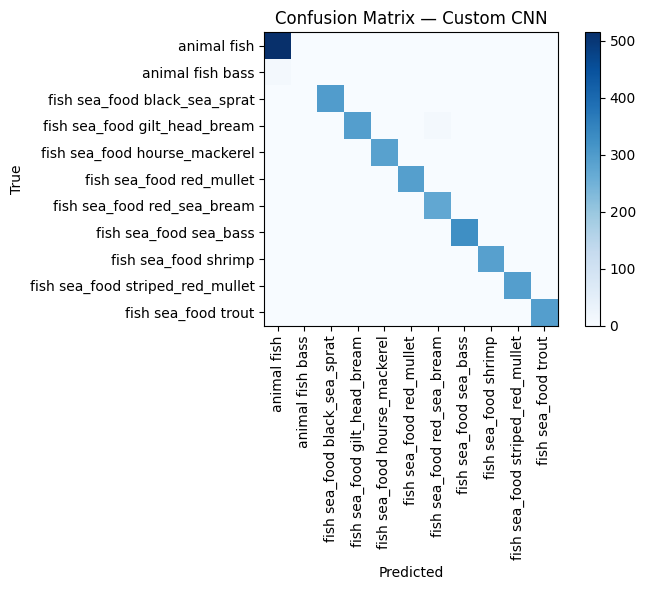

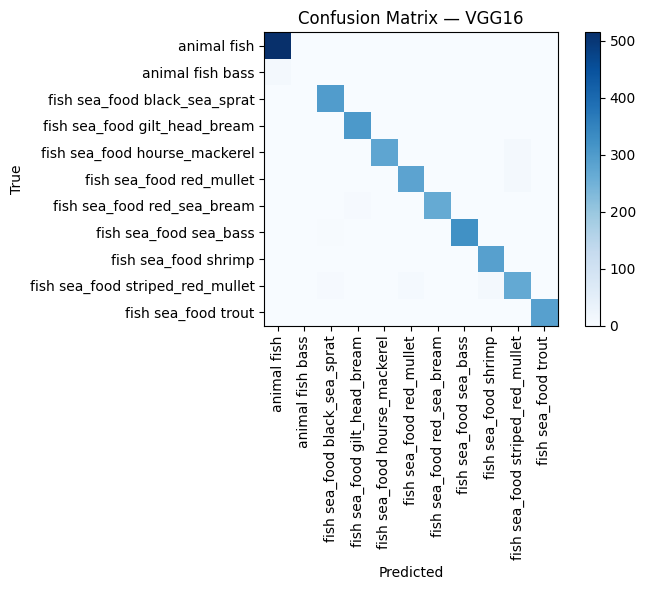

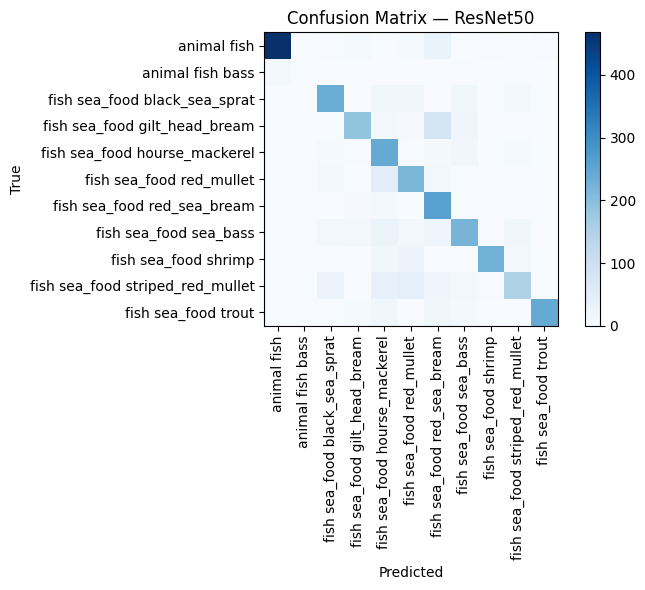

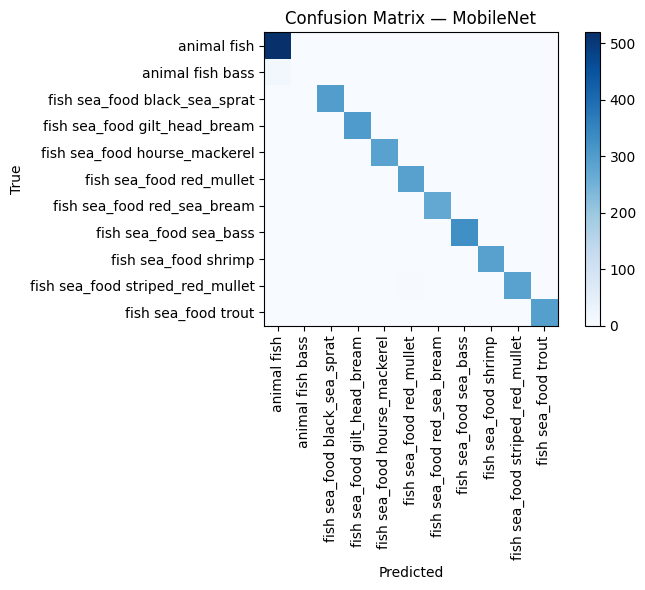

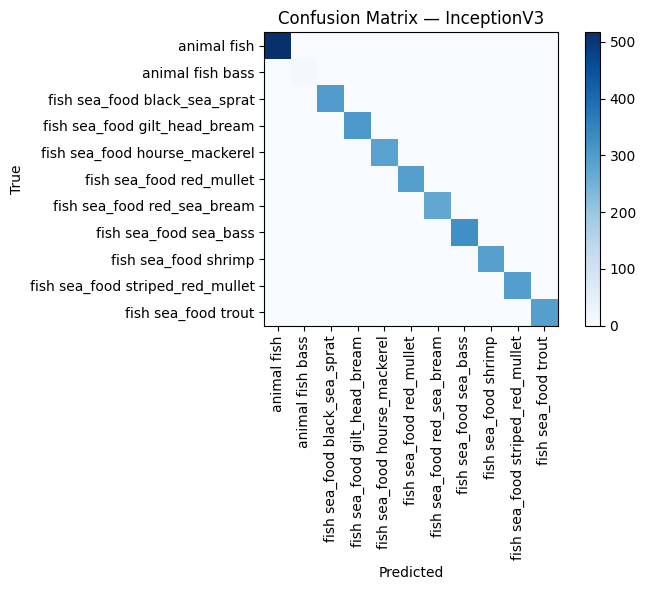

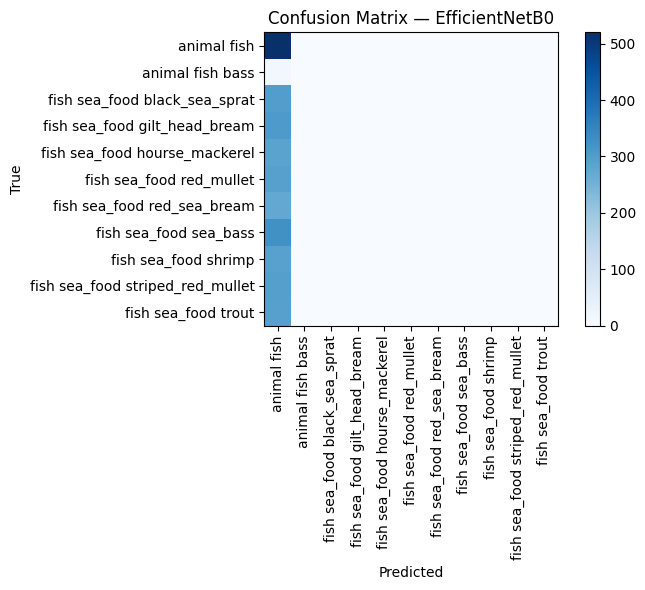

In [59]:
# Essential Imports
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the confusion matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

class_names = list(test_data.class_indices.keys())
y_true = test_data.classes

# Custom CNN
plot_confusion_matrix(y_true, cnn_pred, class_names, "Confusion Matrix — Custom CNN")

# VGG16
plot_confusion_matrix(y_true, vgg_pred, class_names, "Confusion Matrix — VGG16")

# ResNet50
plot_confusion_matrix(y_true, resnet_pred, class_names, "Confusion Matrix — ResNet50")

# MobileNet
plot_confusion_matrix(y_true, mobilenet_pred, class_names, "Confusion Matrix — MobileNet")

# InceptionV3
plot_confusion_matrix(y_true, inception_pred, class_names, "Confusion Matrix — InceptionV3")

# EfficientNetB0
plot_confusion_matrix(y_true, efficient_pred, class_names, "Confusion Matrix — EfficientNetB0")

In [60]:
# Essential Imports
import matplotlib.pyplot as plt

histories = [
    ("Custom CNN",history_cnn),
    ("VGG16 (fine-tuned)", history_vgg),
    ("ResNet50 (fine-tuned)", history_resnet),
    ("MobileNet (fine-tuned)", history_mobilenet),
    ("InceptionV3 (fine-tuned)", history_inception),
    ("EfficientNetB0 (fine-tuned)", history_efficientnet),
]

def _get(hist, k1, k2):
    return hist.history.get(k1) or hist.history.get(k2)

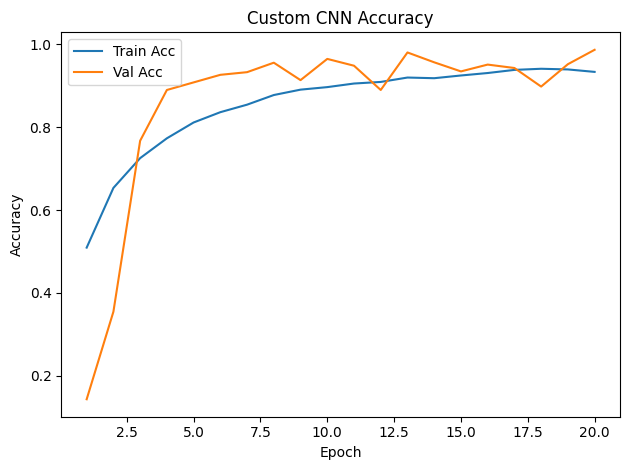

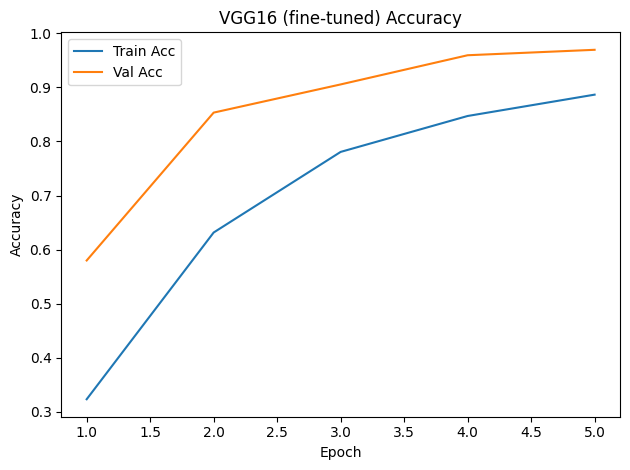

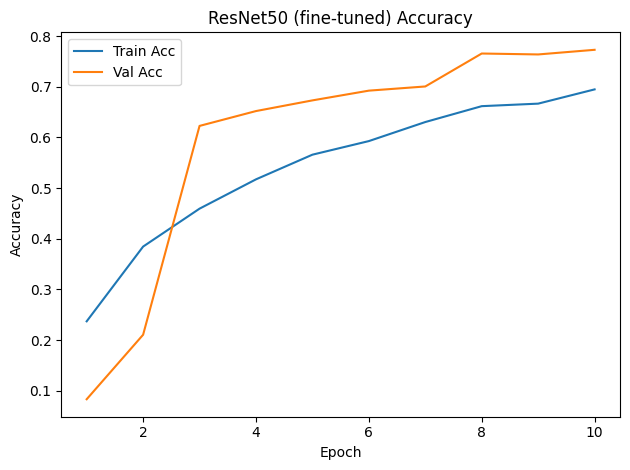

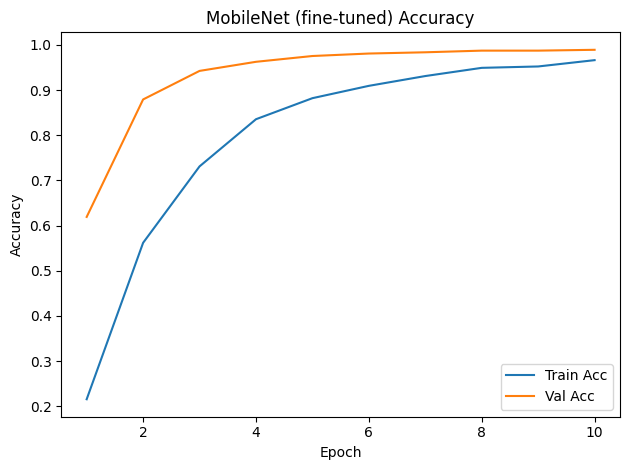

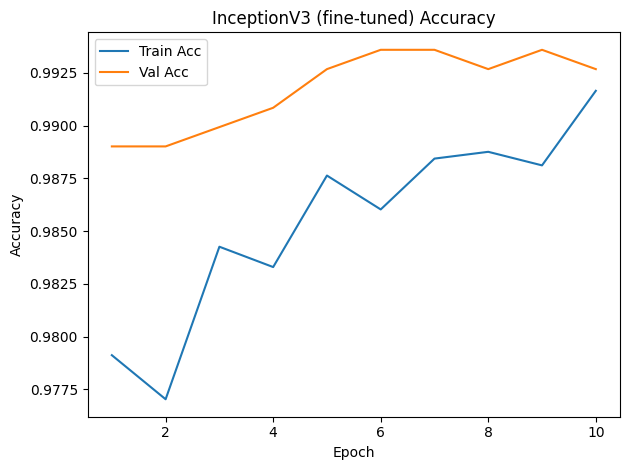

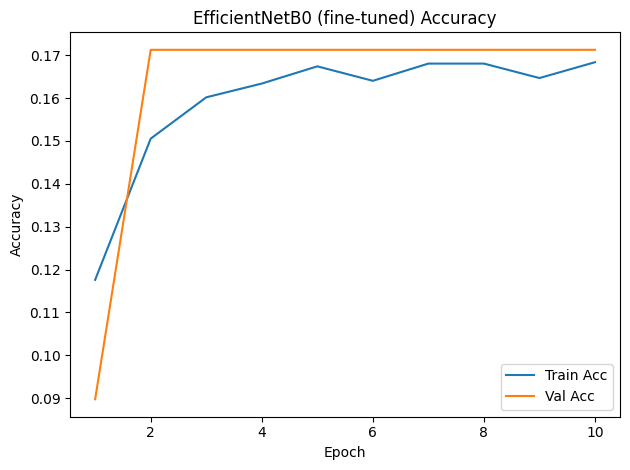

In [61]:
# Iterate through each model
for title, h in histories:
    acc = _get(h, "accuracy", "acc")
    val_acc = _get(h, "val_accuracy", "val_acc")
    loss = h.history.get("loss")
    val_loss = h.history.get("val_loss")
    epochs = range(1, len(loss)+1) if loss else range(1, len(acc)+1)

    # Plot Accuracy
    plt.figure()
    if acc:
        plt.plot(epochs, acc, label="Train Acc")
    if val_acc:
        plt.plot(epochs, val_acc, label="Val Acc")
    plt.title(f"{title} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [62]:
# Store the accuracies in a dictionary
model_accuracies = {
    "Custom CNN":cnn_accuracy,
    "VGG16": vgg_accuracy,
    "ResNet50": resnet_accuracy,
    "MobileNet": mobilenet_accuracy,
    "InceptionV3 Accuracy":inception_accuracy,
    "EfficientNetB0 Accuracy":efficient_accuracy
    # Add other models like InceptionV3 and EfficientNetB0 once their evaluation is complete
}

In [63]:
# Find the model with the highest accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

# Print the best model and its accuracy
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Best Model: InceptionV3 Accuracy
Best Accuracy: 0.9984
